BSCS - IS - 4B

**EXERCISE 4: Object Detection and Recognition**

TASKS COVERED:

1.  HOG (Histogram of Oriented Gradients) Object Detection

2. YOLO (You Only Look Once) Object Detection

3. SSD (Single Shot MultiBox Detector) with TensorFlow

4. Traditional vs. Deep Learning Object Detection Comparison

**Task 1: : HOG (Histogram of Oriented Gradients) Object Detection**





In [ ]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

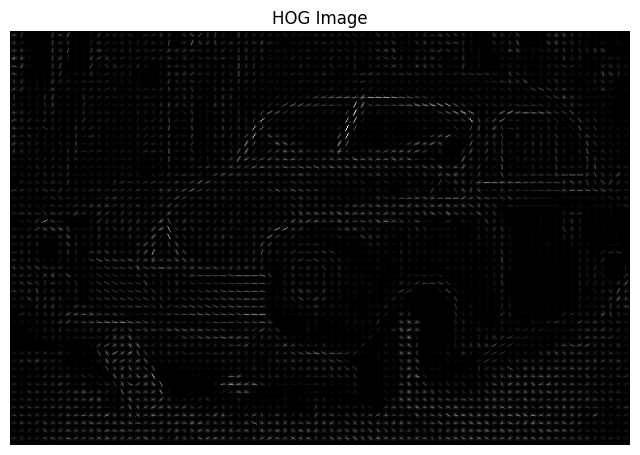

In [ ]:
# load image
image = cv2.imread('anime.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Ensure the image is explicitly 2-dimensional
gray_image = gray_image.squeeze()

#This line ensures the image is explicitly 2D by removing any redundant dimensions.
if gray_image.ndim == 3 and gray_image.shape[2] == 1:
   gray_image = gray_image[:, :, 0]

# Apply HOG descriptor
features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), visualize=True, channel_axis=None)

# Display the HOG image
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Image')
plt.show()

**Task 2: YOLO (You Only Look Once) Object Detection**

In [ ]:
!pip install ultralytics

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO  # Import the YOLO class from the ultralytics package
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab


0: 448x640 1 truck, 253.8ms
Speed: 2.4ms preprocess, 253.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


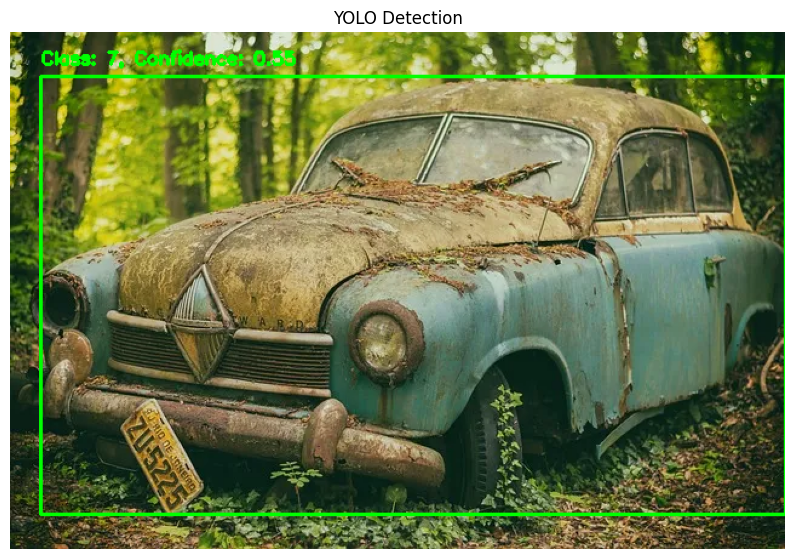

In [ ]:
# Load the pre-trained YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model

# Load an image
image = cv2.imread('anime.jpg')

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError("Image not found. Please check the image path.")

# Perform inference
results = model(image)

# Process results
for result in results:
    boxes = result.boxes  # Get the boxes from the detection results
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].numpy()  # Get the bounding box coordinates
        conf = box.conf[0].item()  # Get the confidence score
        class_id = int(box.cls[0].item())  # Get the class ID

        if conf > 0.5:  # Filter out low confidence detections
            label = f"Class: {class_id}, Confidence: {conf:.2f}"
            # Draw bounding box and label
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with detections using cv2_imshow
#cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow()

# Additionally, using matplotlib to show the image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper color display
plt.axis('off')
plt.title('YOLO Detection')
plt.show()


# Exercise 3: SSD (Single Shot MultiBox Detector) with TensorFlow
Task:
SSD is a real-time object detection method. For this exercise:

* Load an image of your choice.
* Utilize the TensorFlow Object Detection API to apply the SSD model.
* Detect objects within the image and draw bounding boxes around them.
* Compare the results with those obtained from the YOLO model.

In [ ]:
# Install required packages if not already done
!pip install tensorflow opencv-python matplotlib

import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

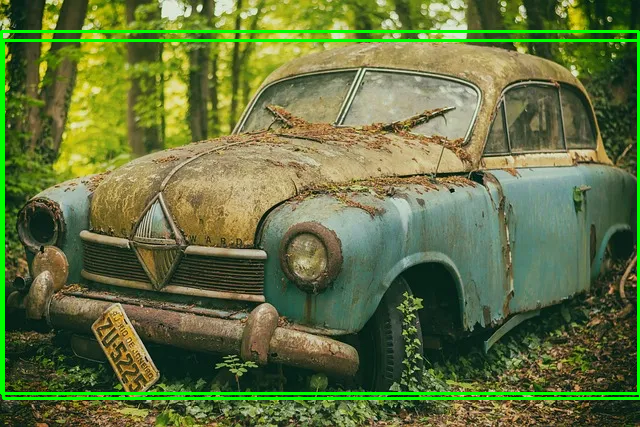

In [ ]:
# Load pre-trained SSD model
model = tf.saved_model.load('ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model')

# load image
image_path = 'anime.jpg'
image_np = cv2.imread(image_path)
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

# Perform inference
detections = model(input_tensor)

# Visualize the bounding boxes
# Access 'num_detections' using bracket notation instead of .pop
for i in range(int(detections['num_detections'][0])):
    if detections['detection_scores'][0, i] > 0.5:
        # Get Bounding box coordinates
        ymin, xmin, ymax, xmax = detections['detection_boxes'][0, i].numpy()
        (left, right, top, bottom) = (xmin * image_np.shape[1], xmax * image_np.shape[1],
                                      ymin * image_np.shape[0], ymax * image_np.shape[0])
        # Draw bounding box
        cv2.rectangle(image_np, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)

# Import cv2_imshow from google.colab.patches
from google.colab.patches import cv2_imshow

# Display the image using cv2_imshow
cv2_imshow(image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Exercise 4: Traditional vs. Deep Learning Object Detection Comparison
Task:
Compare traditional object detection (e.g., HOG-SVM) with deep learning-based methods (YOLO,
SSD):
* Implement HOG-SVM and either YOLO or SSD for the same dataset.
* Compare their performances in terms of accuracy and speed.
* Document the advantages and disadvantages of each method.



0: 448x640 1 truck, 153.2ms
Speed: 3.2ms preprocess, 153.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


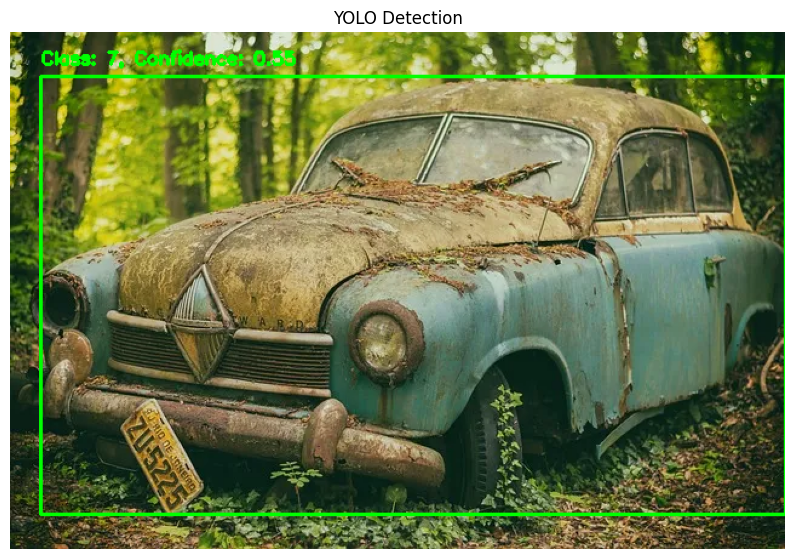

YOLO Processing Time: 0.2540 seconds


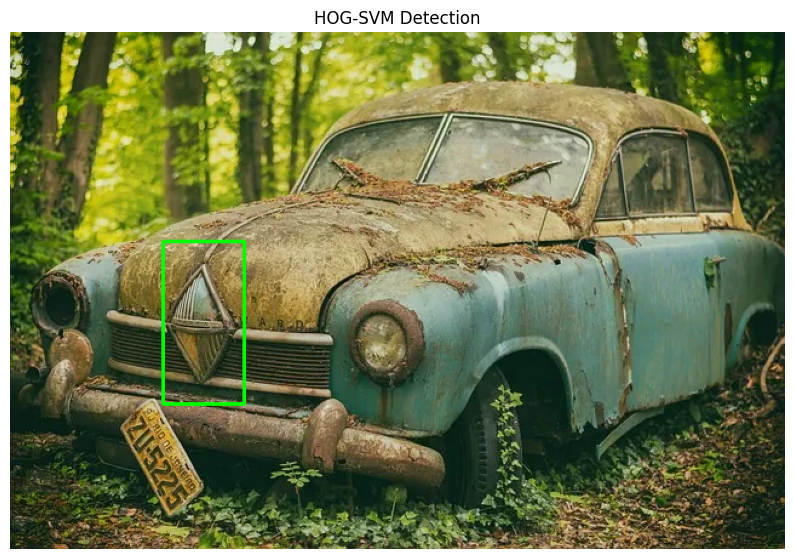

HOG-SVM Processing Time: 0.2435 seconds


In [ ]:
def display_image(image, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper color display
    plt.axis('off')
    plt.title(title)
    plt.show()

# Load the pre-trained YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model

# Load an image for detection
image_path = 'anime.jpg'
image_yolo = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_yolo is None:
    raise FileNotFoundError("Image not found. Please check the image path.")

# --------- YOLO Detection ---------
start_time_yolo = time.time()  # Start time for YOLO speed measurement
results = model(image_yolo)  # Perform inference
end_time_yolo = time.time()  # End time for YOLO speed measurement

# Process YOLO results
for result in results:
    boxes = result.boxes  # Get the boxes from the detection results
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].numpy()  # Get the bounding box coordinates
        conf = box.conf[0].item()  # Get the confidence score
        class_id = int(box.cls[0].item())  # Get the class ID

        if conf > 0.5:  # Filter out low confidence detections
            label = f"Class: {class_id}, Confidence: {conf:.2f}"
            # Draw bounding box and label
            cv2.rectangle(image_yolo, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(image_yolo, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display YOLO detection results
display_image(image_yolo, 'YOLO Detection')
print(f"YOLO Processing Time: {end_time_yolo - start_time_yolo:.4f} seconds")


# --------- HOG-SVM Detection ---------
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Load the same image for HOG-SVM detection
image_hog = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_hog is None:
    raise FileNotFoundError("Image not found. Please check the image path.")

# Perform HOG detection
start_time_hog = time.time()  # Start time for HOG speed measurement
boxes, weights = hog.detectMultiScale(image_hog, winStride=(8, 8), padding=(8, 8), scale=1.05)
end_time_hog = time.time()  # End time for HOG speed measurement

# Draw bounding boxes on the HOG-SVM image
for (x, y, w, h) in boxes:
    cv2.rectangle(image_hog, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display HOG-SVM detection results
display_image(image_hog, 'HOG-SVM Detection')
print(f"HOG-SVM Processing Time: {end_time_hog - start_time_hog:.4f} seconds")